In [19]:
%matplotlib inline

In [20]:
import matplotlib.pylab as plt
import numpy as np

In [50]:
## to display animations inline
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))


In [51]:
# from grid
ncol = 94
nrow = 63
coords = []
for line in open("coords_open", 'r'):
    item = line.rstrip() # strip off newline and any trailing whitespace
    coords.append(line)
    
npt, ne = [int(j) for j in coords[0].split()]
x = np.zeros(npt + 1)
y = np.zeros(npt + 1)
z = np.zeros(npt + 1)
for i in range(1, npt + 1):
    x[i], y[i], z[i] = [float(l) for l in coords[i].split()]

global nop
nop = np.zeros([ncol + 1, nrow + 1, 4], dtype=int)
count = 0
for j in range(1, ncol + 1):
    for k in range(1, nrow + 1):
        nop[j, k, :] = [int(l) for l in coords[count + 1 + npt].split()]
        count += 1
        

In [52]:
xc = np.zeros([ncol + 2, nrow + 2])  # coordinates of cell centers
yc = np.zeros([ncol + 2, nrow + 2])
zc = np.zeros([ncol + 2, nrow + 2])

for j  in range(1, ncol + 1):  # Compute grid metrics
    for k in range(1, nrow + 1):
        n1 = nop[j, k, 0]
        n2 = nop[j, k, 1]
        n3 = nop[j, k, 2]
        n4 = nop[j, k, 3]
        xc[j, k] = 0.25 * (x[n1] + x[n2] + x[n3] + x[n4])
        yc[j, k] = 0.25 * (y[n1] + y[n2] + y[n3] + y[n4])
        zc[j, k] = 0.25 * (z[n1] + z[n2] + z[n3] + z[n4])

In [53]:
slope = ((np.max(zc) - np.min(zc))/(np.max(yc) - np.min(yc))*100)
print 'slope = {0:.2f}%'.format((np.max(zc) - np.min(zc))/(np.max(yc) - np.min(yc))*100)

slope = 3.70%


In [54]:
t = []
itp = []  #  print step
it = []   #  time step
f =  open("time.out", 'r')
f.next()
for line in f:
        a = (line.strip().split(" "))
        a = [b for b in a if b]
        t.append(float(a[0]))
        itp.append(int(a[1]))
        it.append(int(a[2]))

ntstep = len(itp)
print 'number of time steps = {0}'.format(ntstep)
#ntstep  = min(ntstep, 50)

nmber of time steps = 401


In [55]:
t0 = np.zeros([ntstep, ncol+2, nrow+2])
h =  np.zeros([ntstep, ncol+2, nrow+2])

step = 0
for line in open("myout_open_imperm.out", 'r'):
    a = (line.strip().split(" "))
    a = [float(b) for b in a if b]
    try:
        j = int(a[0])
        k = int(a[1])
        t0[dumt,j,k] = a[2]
        h[dumt,j,k] = a[3] 
    except IndexError:
        dumt = int(a[0])
        step += 1

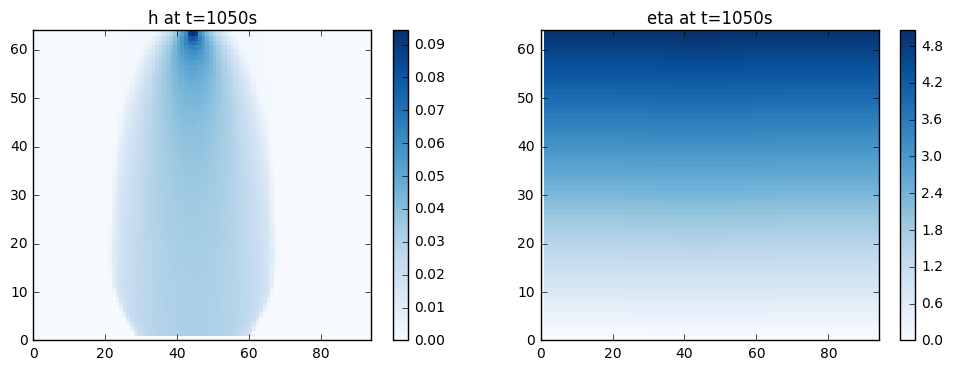

In [56]:
plt.figure(figsize = (12, 4))
tdum = 210
plt.subplot(121)
plt.pcolor( h[tdum].T, cmap = 'Blues')
plt.title('h at t={0:.0f}s'.format(t[tdum]))
plt.xlim(0, 94); plt.ylim(0, 64)
plt.colorbar()
plt.subplot(122)
plt.pcolor(zc.T +  h[tdum].T, cmap = 'Blues')
plt.title('eta at t={0:.0f}s'.format(t[tdum]))
plt.xlim(0, 94); plt.ylim(0, 64)
plt.colorbar()

In [62]:
slope

3.7017294776119405

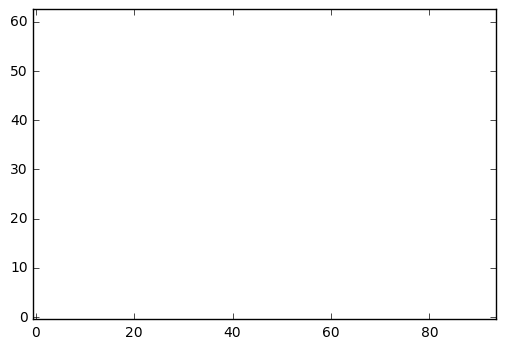

In [58]:
from matplotlib import mlab, cm
fld = h
norm = cm.colors.Normalize(vmax= fld.max() + .1, vmin=0)

from matplotlib import animation


fig2 = plt.figure()

ims = []

for add in np.arange(ntstep):
    ims.append((plt.imshow( fld[add, 1:-1, 1:-1].T, 
            cmap = 'Blues', origin='lower', norm = norm),))
im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=False)
im_ani.save('eta_imperm_{0:.1f}.mp4'.format(slope))

In [59]:
display_animation(im_ani)

In [60]:
def myfloat(b):
    try: 
        b = float(b)
    except ValueError:
        b = float(b.split('-')[0])*10**(-float(b.split('-')[1]))

    return b

In [121]:
# Volume tracking
if True:
    t = []; 
    dvol = [];
    infl = [];
    flux = [];    
f = open("dvol_imperm.out", 'r');  f.next() 
for line in f:
        a = (line.strip().split(" "))
        a = [myfloat(b) for b in a if b]
        t.append(a[0])
        dvol.append(a[1])
        flux.append(a[2])
        infl.append(a[3])
if True:         
    t = np.array(t)
    dvol = np.array(dvol)
    flux = np.array(flux)
    infl = np.array(infl)

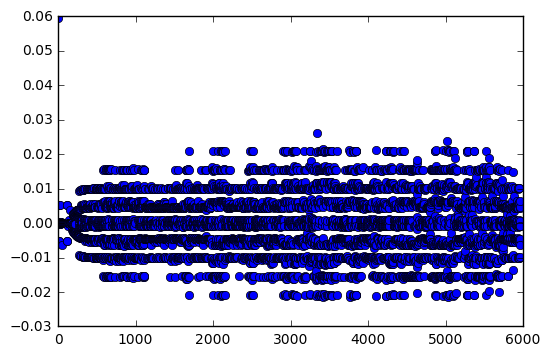

In [137]:

tdum = 10000
plt.plot(dvol[:tdum] - flux[:tdum], 'o')
# plt.plot(t[:tdum], dvol[:tdum], 'o')
# plt.plot(t[:tdum], flux[:tdum], '.')

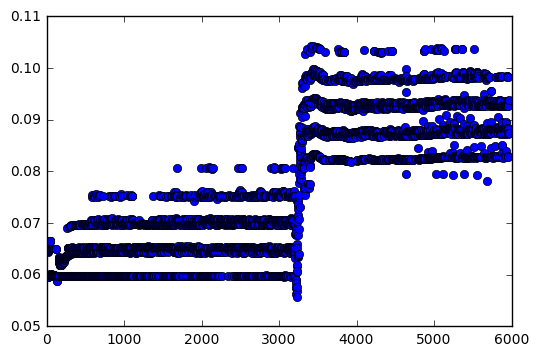

In [140]:
plt.plot(np.cumsum(dvol[:tdum] - flux[:tdum]), 'o')

In [95]:
# Volume tracking
if True:
    t = []; 
    vol = []; 
    infl = []
    flux1 = []; 
    flux2 = []; 
    flux3 = []; 
    flux4 = []

f = open("diag_imperm.out", 'r');  f.next()
for line in f:
        a = (line.strip().split(" "))
        a = [myfloat(b) for b in a if b]
        t.append(a[0])
        vol.append(a[1])
        infl.append(a[2])
        flux1.append(a[3])
        flux2.append(a[4])
        flux3.append(a[5])
        flux4.append(a[6])

if True:         
    t = np.array(t)
    vol = np.array(vol)
    inlf = np.array(infl)
    flux1 = np.array(flux1)
    flux2 = np.array(flux2)
    flux3 = np.array(flux3)
    flux4 = np.array(flux4)

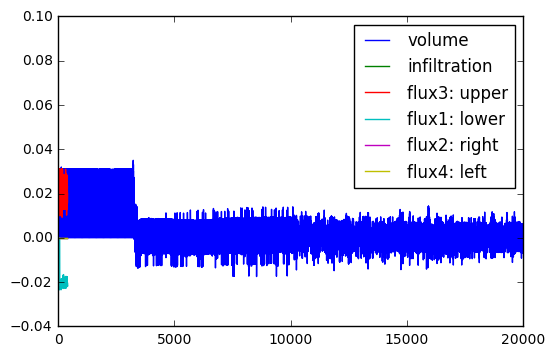

In [89]:
plt.plot(dvol, label = 'volume')
plt.plot( infl, '-', label = 'infiltration')
plt.plot( flux3, '-', label = 'flux3: upper')
plt.plot( flux1, label = 'flux1: lower')
plt.plot( flux2, label = 'flux2: right')
plt.plot( flux4, label = 'flux4: left')
plt.legend(loc= 'best')

In [ ]:
plt.plot(dvol, label = 'volume')
plt.plot( infl, '-', label = 'infiltration')
plt.plot( flux3, '-', label = 'flux3: upper')
plt.plot( flux1, label = 'flux1: lower')
plt.plot( flux2, label = 'flux2: right')
plt.plot( flux4, label = 'flux4: left')
plt.legend(loc= 'best')

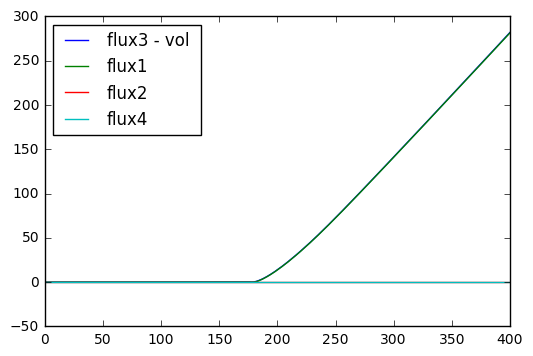

In [47]:
plt.plot(flux3 - vol, label = 'flux3 - vol ')
plt.plot(-flux1, label = 'flux1')
plt.plot(- flux2, label = 'flux2')
plt.plot(-flux4, label = 'flux4')
# plt.plot( flux2, label = 'flux')
#plt.plot(np.cumsum(infl))
plt.legend(loc= 'best')

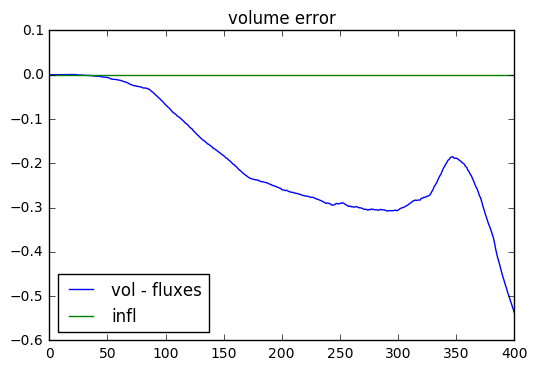

In [48]:
plt.plot(  vol - flux3 - flux1 - flux2 - flux4, label = 'vol - fluxes')
plt.plot(  inlf, label = 'infl')
plt.legend(loc  = 'best')
plt.title('volume error')
# units are m3 

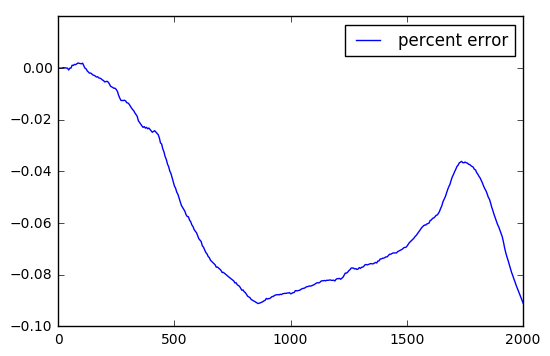

In [49]:
total = ( vol - flux3 - flux1 - flux2 - flux4)
plt.plot(t[1:],  total[1:]/flux3[1:]*100, label = 'percent error')
plt.legend(loc  = 'best')

## Other output files: 

In [57]:
# read coordinates from fortran 
xc =  np.zeros([ ncol+2, nrow+2])
yc =  np.zeros([ ncol+2, nrow+2])
zc =  np.zeros([ ncol+2, nrow+2])

for line in open("mycoords.out", 'r'):
        a = (line.strip().split(" "))
        a = [float(b) for b in a if b]
        j = int(a[0])
        k = int(a[1])
        try:
            xc[j,k] = a[2]
            yc[j,k] = a[3]
            zc[j,k] = a[4]
        except IndexError:
            print a

In [58]:
# test point
h_test = []
u_test = []
v_test = []
for line in open("test_point_slope.out", 'r'):
        a = (line.strip().split(" "))
        a = [float(b) for b in a if b]
        h_test.append(a[0])
        u_test.append(a[1])
        v_test.append(a[2])

         

In [59]:
area =  np.zeros([ ncol+2, nrow+2])
q1 =  np.zeros([ ncol+2, nrow+2])
q2 =  np.zeros([ ncol+2, nrow+2])

for line in open("gridmetrics.out", 'r'):
        a = (line.strip().split(" "))
        a = [float(b) for b in a if b]
        j = int(a[0])
        k = int(a[1])
        try:
            area[j,k] = a[2]
            q1[j,k] = a[3]
            q2[j,k] = a[4]
        except IndexError:
            print a

## Influx  (boundary flux at top boundary, 3)

In [26]:


itp = []  #  print step
it = []   #  time step
f =  open("time.out", 'r')
f.next()
for line in f:
        a = (line.strip().split(" "))
        a = [b for b in a if b]
        itp.append(int(a[1]))

ntstep = len(itp)

f = np.zeros([ntstep, ncol+1 ])

step = 0
for line in open("fluxes.out", 'r'):
    a = (line.strip().split(" "))
    a = [float(b) for b in a if b]
    try:
        j = int(a[0])
        k = int(a[1])
        f[dumt,j] = a[2]
    except IndexError:
        dumt = int(a[0])
        step += 1
        


In [27]:

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 94), ylim=(np.min(f) - .01, np.max(f) + .01))
line, = ax.plot([], [], lw=1)
plt.title('flux ($hv$) along top boundary - uniform slope')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.arange(95)
    y = f[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=ntstep,
                               interval= 100, blit=False)

anim.save('flux_uniform_slope.mp4')
# call our new function to display the animation
display_animation(anim)
